# Dependencies

The `SimInterface` package depends on the `Scipy` stack. So nothing will work if you don't have that installed.

In order to see generate the block diagrams, you'll also need the `graphviz` package. 

# The DC Motor Example

In this notebook, we'll demonstrate how to use the SimInterface package to build a model of a DC motor connected with an RL circuit. 

The dynamic equations are given by:
\begin{align*}
L\dot I + Ri &= V-K\dot\theta \\
J\ddot \theta + b\theta &= KI.
\end{align*}

Here, $V$ is an input voltage, $I$ is the current through the circuit, and $\theta$ is the angle of the motor. 

First, let's initialize the packages that we'll need. 

In [1]:
import SimInterface as SI
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Defining Parameters

This system depends on the parameters, $L$, $R$, $K$, $J$, and $b$. To run a simulation with a fixed parameter set, their values could be hard-coded into the description of the differential equations. However, in many studies it is useful to be able to see how the system response to variations in the parameters. 

To facilitate this, we have a dedicated class for static variables called `Parameter`. To see how it works, we'll just initialize all of the parameters to some nominal values.

In [2]:
L = SI.Parameter(label='L',data=1.0)
R = SI.Parameter(label='R',data=2.0)
K = SI.Parameter(label='K',data=5.0)
J = SI.Parameter(label='J',data=0.5)
b = SI.Parameter(label='b',data=3.0)

Every parameter instance has a Pandas dataframe attribute `.data`:

In [3]:
L.data

,L
0,1


# Defining Signals

The voltage, $V$ is an exogenous input signal. We will take it to be a sinusoid of period $2$ and amplitude $3$, lasting for $10s$.

To define a `Signal`, we enter both the `data`, as well as time-stamps for the data. This is so that we know what time $V(t)$ takes a particular value.

In [4]:
Time = np.linspace(0,10,1001)
Vsig = 3 * np.sin(np.pi * Time)
V = SI.Signal(label='V',data=Vsig,TimeStamp=Time)

Just like `Parameter` objects, the data for a `Signal` object is stored in a Pandas dataframe called `.data`. Let's look at the first 10 entries and also plot the data. 

In [5]:
V.data.iloc[:10]

,V
0.00,0.000000
0.01,0.094232
0.02,0.188372
0.03,0.282325
0.04,0.376000
0.05,0.469303
0.06,0.562144
0.07,0.654430
0.08,0.746070
0.09,0.836973


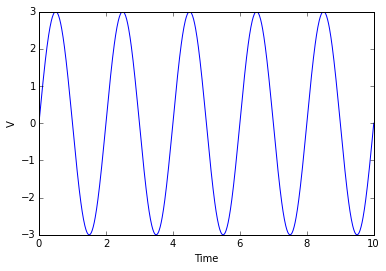

In [6]:
plt.plot(Time,V.data)
plt.xlabel('Time')
plt.ylabel(V.label)

# Defining the RL Circuit

The equations are sufficiently simple that we could code up one differential equation for all of them. However, it is instructive to code up the individual component systems separately, and then connect then connect them up later. 

For just the RL circuit, the dynamics of the current are given in first-order form as
\begin{equation*}
\dot I = -\frac{R}{L} I + \frac{1}{L}V.
\end{equation*}
In code this is given by:

In [7]:
def RLVectorField(I,V,R,L):
    Idot = -(R/L) * I + (1./L) * V
    return Idot

## Caution: Argument names should match variable labels.

It is important that in the function the arguments, `I`, `V`, `R`, and `L`, should match the labels given to associated signals and parameters. If they do not, the program will not know which data to associate with it.

## Initializing the current
We will assume that the initial current is given by $I(0) = 0$. We will store the current as a signal variable. At the moment, we only set the initial condition.

In [8]:
I = SI.Signal(label='I',data=0.,TimeStamp=0.)
# Just display the signal to see that it worked.
I.data

,I
0,0


In [9]:
RLEquation = SI.DifferentialEquation(func=RLVectorField,StateVars=I,InputVars=(V,R,L),label='RL')

NameError: global name 'ExogenousVarSet' is not defined

In [ ]:
[v.label for v in RLEquation.InputVars]

In [ ]:
I.data.shape

In [ ]:
SI.Signal('hey',np.zeros((1,2)),np.arange(1)).data